In [446]:

import numpy as np

import pandas as pd
from IPython.display import display 
from xgboost import XGBClassifier

%matplotlib inline



df = pd.read_csv('titanic data/train.csv')
test=pd.read_csv('titanic data/test.csv')

display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data dictionary is as follows:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)



In [369]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve;

In [370]:

df.shape,test.shape # (rows, columns)


((891, 12), (418, 11))

## Data Exploration (exploratory data analysis or EDA)

In [371]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [372]:

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [373]:
# No. of positive and negative patients in our samples
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

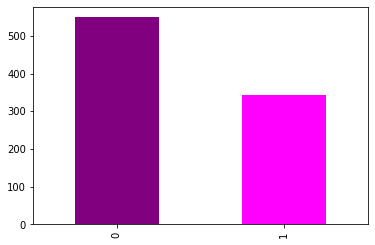

In [374]:
# Plot the value counts with a bar graph
df.Survived.value_counts().plot(kind="bar", color=["purple", "magenta"]);

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [376]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [377]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [378]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


There are 207 males and 96 females in our study.

In [379]:
# Compare target column with sex column
pd.crosstab(df.Survived, df.Age)

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,2,2,0,0,0,0,0,0,0,1


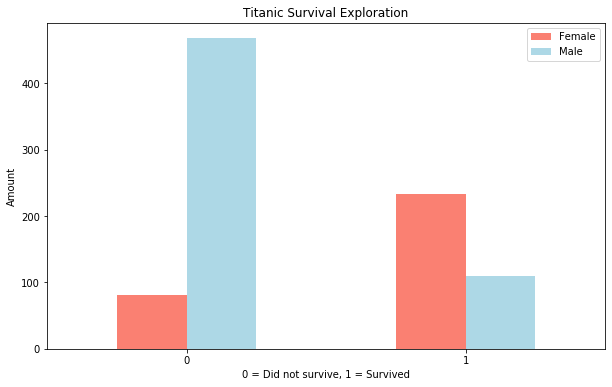

In [380]:

pd.crosstab(df.Survived, df.Sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Titanic Survival Exploration")
plt.xlabel("0 = Did not survive, 1 = Survived")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

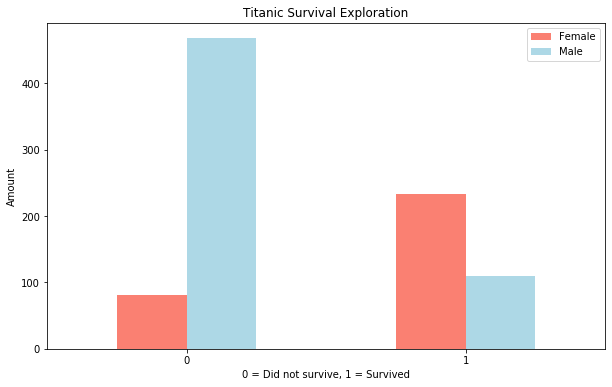

In [381]:

pd.crosstab(df.Survived, df.Sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Titanic Survival Exploration")
plt.xlabel("0 = Did not survive, 1 = Survived")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

Males had less chance of survival than females.

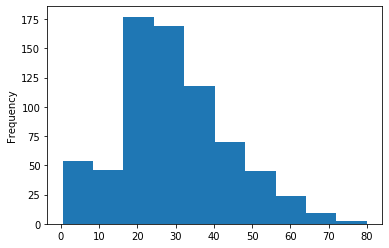

In [382]:
# Histograms to check age distribution 
df.Age.plot.hist();

It is not a perfect normal distribution but sways to the left.

## 5. Modeling



In [383]:
df_tmp=df.copy()
tst=test.copy()

In [384]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [385]:
df_tmp["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [386]:
df_tmp["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [387]:
# Feature engineering
df_tmp.drop("Name",axis=1,inplace=True)
df_tmp.drop("Ticket",axis=1,inplace=True)
df_tmp.drop("PassengerId",axis=1,inplace=True)
tst.drop("Name",axis=1,inplace=True)
tst.drop("Ticket",axis=1,inplace=True)
tst.drop("PassengerId",axis=1,inplace=True)



In [388]:
df_tmp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [389]:
tst.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [390]:
df_tmp.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [391]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [392]:
tst.isna().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [393]:
df_tmp.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [394]:
tst.Fare.value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [395]:
df1_tmp=df_tmp.drop("Survived",axis=1)
df1_tmp.drop("Cabin",axis=1,inplace=True)

df1_tmp.head()
df1_tmp.isna().sum()
tst.drop("Cabin",axis=1,inplace=True)

In [396]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cat_features=["Sex","Cabin","Embarked"]
num_features=["Age"]


In [397]:
df1_tmp["Age"].fillna(df1_tmp["Age"].median(),inplace=True)
tst["Age"].fillna(tst["Age"].mean(),inplace=True)
tst["Fare"].fillna(tst["Fare"].median(),inplace=True)
df1_tmp["Embarked"].fillna("S",inplace=True)

In [398]:
cat_features=["Embarked","Sex"]
one_hot=OneHotEncoder()

transformer2=ColumnTransformer([("one-hot-2",one_hot,cat_features)],remainder="passthrough")

transformer=ColumnTransformer([("one-hot",one_hot,cat_features)],remainder="passthrough")
transformed=transformer.fit_transform(df1_tmp)
transformed_tst=transformer.fit_transform(tst)

In [399]:
df1_tmp

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [400]:
tst

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [401]:
transformed_tst

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.8292],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  1.    , 22.3583]])

In [402]:
y=df_tmp["Survived"]

In [403]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [404]:
tst.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [405]:
X_train,X_test,y_train,y_test=train_test_split(transformed,y,test_size=0.2)

### Model choices

I'll be using the following and comparing their results.
1. Logistic Regression
2. KNeighbours Classifier
3. RandomForest Classifier
4. Decision Tree Classifier
5. GradientBoosting Classifier
6. XGBoost Classifier



In [447]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(), "Decision Tree":DecisionTreeClassifier(), "Gradient Boosting":GradientBoostingClassifier(),"XGBoost":XGBClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)*100
    return model_scores

In [448]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'KNN': 69.83240223463687,
 'Logistic Regression': 83.79888268156425,
 'Random Forest': 82.68156424581005,
 'Decision Tree': 78.2122905027933,
 'Gradient Boosting': 85.47486033519553,
 'XGBoost': 81.56424581005587}

In [297]:
transformed.shape

(891, 10)

 It is worth noting that though Gradient Boosting gives best score, it overfits in the model

## Model Comparison



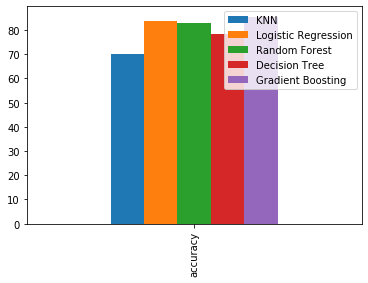

In [408]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot.bar();

Since KNN, Decision Tree, AdaBoost gives relatively quite low accuracy value I decide to ignore them.

### Tuning models with RandomizedSearchCV



In [441]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
boost_grid={"loss":["deviance","exponential"],"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

We first use `RandomizedSearchCV` to try and tune our `LogisticRegression` model.



In [420]:

np.random.seed(42)


rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=20,
                                n_iter=100,
                                verbose=True)


rs_log_reg.fit(X_train, y_train);

C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.7s finished
C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [421]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [422]:
rs_log_reg.score(X_test, y_test)

0.8268156424581006

In [423]:
rs_log=LogisticRegression(solver='liblinear',C=11.288378916846883)
rs_log.fit(X_train,y_train)

LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [424]:
rs_log.coef_

array([[ 7.62934773e-01,  8.02299781e-01,  3.14153143e-01,
         2.25151723e+00, -3.72129536e-01, -1.07756473e+00,
        -2.96459222e-02, -3.03095666e-01, -1.20035648e-01,
         1.28846310e-03]])

In [425]:
# Match features to columns
features_dict = dict(zip(df1_tmp.columns, list(rs_log.coef_[0])))
features_dict

{'Pclass': 0.7629347728310417,
 'Sex': 0.8022997806122764,
 'Age': 0.3141531428626298,
 'SibSp': 2.2515172325400696,
 'Parch': -0.3721295362341033,
 'Fare': -1.077564727851353,
 'Embarked': -0.029645922215474893}

I'll do the same for `RandomForestClassifier`.

In [437]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,n_jobs=-1)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.5s finished
C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [438]:

rs_rf.best_params_


{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [435]:

rs_rf.score(X_test, y_test)

0.8379888268156425

In [442]:
np.random.seed(42)
rs_boost = RandomizedSearchCV(GradientBoostingClassifier(),
                           param_distributions=boost_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,n_jobs=-1)
rs_boost.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.3s finished


In [443]:
rs_boost.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None,
 'loss': 'deviance'}

In [445]:
rs_boost.score(X_test,y_test)

0.8324022346368715

Because RandomForest and GradientBoosting is returning a better accuracy score, I use GridSearchCV
on it.

In [429]:
rf_grid2={"n_estimators": np.arange(600,850, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(10, 20, 2),
           "min_samples_leaf": np.arange(1, 10, 2)}



gs_log_reg = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid2,
                          cv=5,
                          verbose=True,n_jobs=-1)


gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 10.2min finished
C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [439]:
# Check the best parameters
gs_log_reg.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 600}

In [440]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8435754189944135

In [322]:
y_preds=gs_log_reg.predict(transformed_tst)
output=pd.DataFrame({'PassengerID':tst_or.PassengerId,'Survived':y_preds})

output.to_csv("titanicsub.csv",index=False)


# Using AdaBoost Classifier

In [323]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=800,min_samples_split=18,min_samples_leaf=3,max_depth=10),n_estimators=100,learning_rate=0.1)
adaboost.fit(X_train,y_train)
print(adaboost.score(X_test,y_test))



0.8268156424581006


In [456]:
# AdaBoost does not improve results